Import + lecture du csv

In [635]:
import pandas as pd
data = pd.read_csv("heart.csv", delimiter = ";")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0.0,Normal,172.0,N,0.0,Up,0.0
1,49,F,NAP,160.0,180.0,0.0,Normal,156.0,N,1.0,Flat,1.0
2,37,M,ATA,130.0,283.0,0.0,ST,98.0,N,0.0,Up,0.0
3,48,F,ASY,138.0,214.0,0.0,Normal,108.0,Y,1.5,Flat,1.0
4,54,M,NAP,150.0,195.0,0.0,Normal,122.0,N,0.0,Up,0.0


## Copie pour éviter de toucher aux données

In [636]:
df = data.copy()


919 lignes, 12 variables

In [637]:
df.shape

(919, 12)

Somme des nulls par colonne

In [638]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     1
RestingBP         1
Cholesterol       1
FastingBS         1
RestingECG        1
MaxHR             1
ExerciseAngina    1
Oldpeak           1
ST_Slope          1
HeartDisease      1
dtype: int64

## Type des variables et les non nulls

In [639]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919 entries, 0 to 918
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             919 non-null    int64  
 1   Sex             919 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 86.3+ KB


In [640]:
df[df['ChestPainType'].isna()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
793,54,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [641]:
df = df.drop(793)

In [642]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### Changer de type la colonne HeartDisease et FastingBS de float en object

In [643]:
df['HeartDisease'] = df['HeartDisease'].astype('int64').astype(object)
df['FastingBS'] = df['FastingBS'].astype('int64').astype(object)

In [644]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172.0,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156.0,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98.0,N,0.0,Up,0
3,48,F,ASY,138.0,214.0,0,Normal,108.0,Y,1.5,Flat,1
4,54,M,NAP,150.0,195.0,0,Normal,122.0,N,0.0,Up,0


In [645]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 918
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 93.2+ KB


## Distribution

In [646]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

## Analyse graphique univarie quanti

Boité à moustache pour l'age

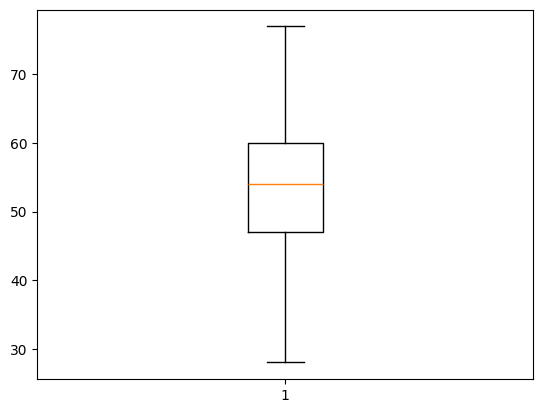

In [647]:
import matplotlib.pyplot as plt

plt.boxplot(df['Age'])
plt.show()

Avec seaborn

In [648]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


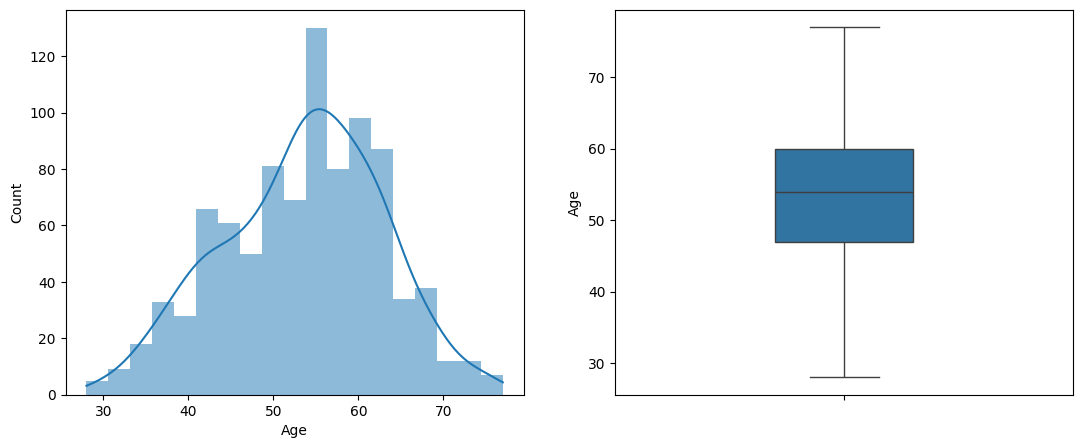

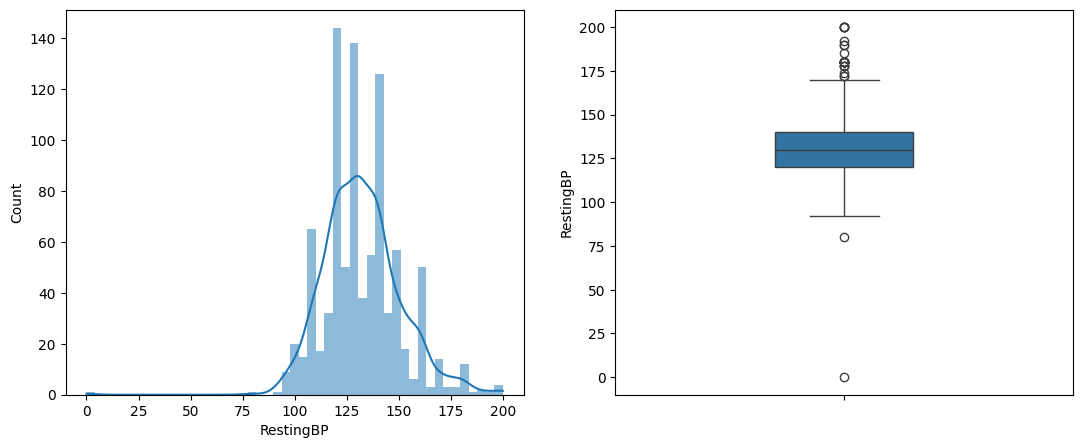

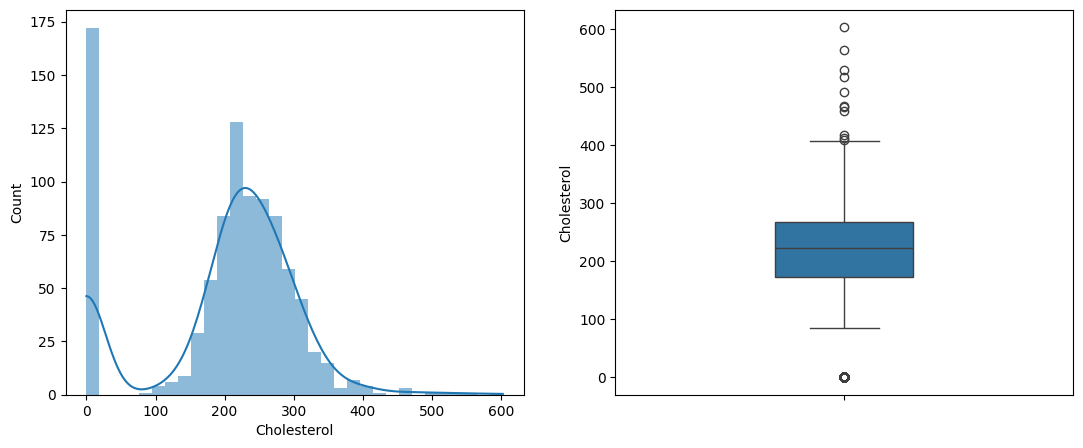

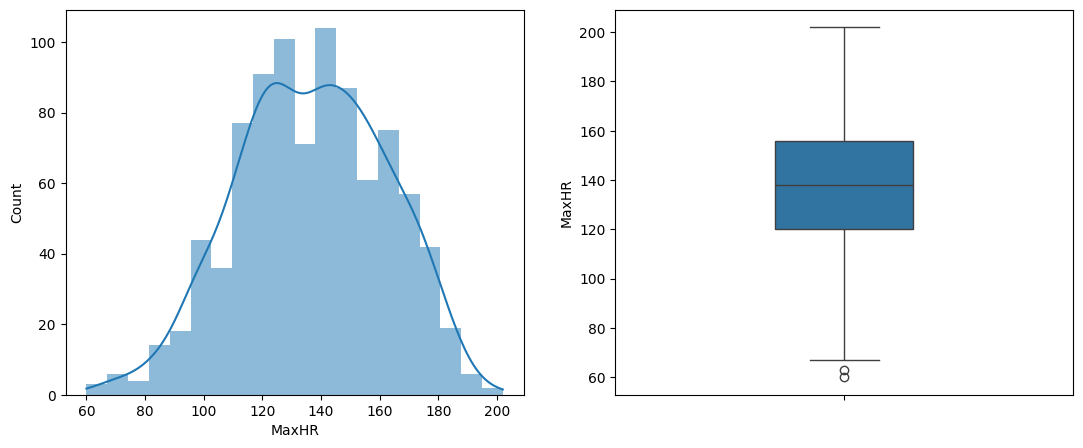

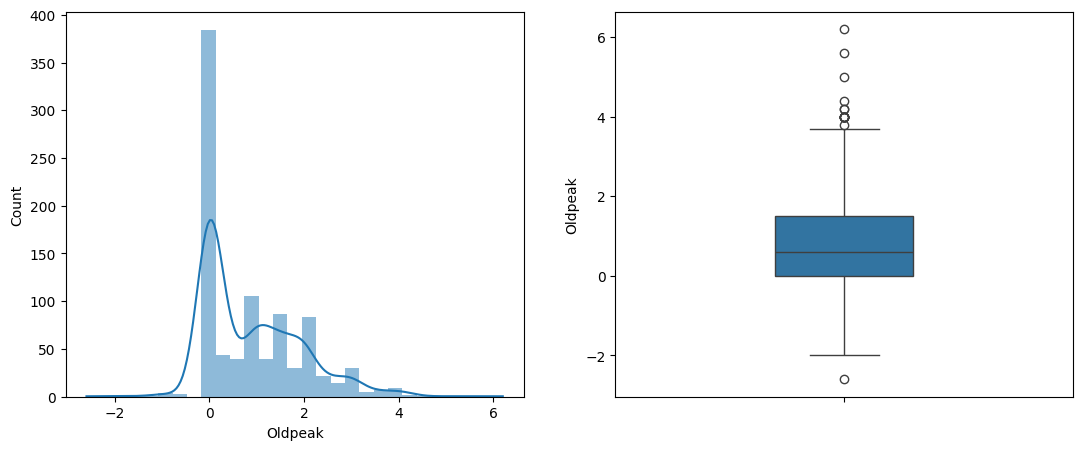

In [649]:
import seaborn as sns

for col in df.select_dtypes(['float64', 'int64']):
    plt.figure(figsize=[13,5])

    plt.subplot(1,2,1)
    sns.histplot(df[col], kde= True, edgecolor= None)

    plt.subplot(1,2,2)
    sns.boxplot(df[col], width=0.3)

Remplacer les 0 par des valeurs nulles 

In [650]:
df.sort_values('Cholesterol')
df['Cholesterol'].loc[df['Cholesterol'] == 0] = None
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 918
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     746 non-null    float64
 5   FastingBS       918 non-null    object 
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 93.2+ KB


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8992\1794941209.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Cholesterol'].loc[df['Cholesterol'] == 0] = None
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8992\1794941209.py:2

Cherche la personne qui a 0 de RestingBP

In [651]:
df[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0.0,NaN,0,Normal,155.0,N,1.5,Flat,1


In [652]:
df['RestingBP'].loc[df['RestingBP'] == 0] = None
df.isnull().sum()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8992\3169224510.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['RestingBP'].loc[df['RestingBP'] == 0] = None
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8992\3169224510.py:1: Se

Age                 0
Sex                 0
ChestPainType       0
RestingBP           1
Cholesterol       172
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

### Analyse univarié quanti

In [653]:
for col in df.select_dtypes('object'):
    print(f'{col :-<20} {df[col].unique()}')

Sex----------------- ['M' 'F' 'Male' 'Female']
ChestPainType------- ['ATA' 'NAP' 'ASY' 'TA']
FastingBS----------- [0 1]
RestingECG---------- ['Normal' 'ST' 'LVH']
ExerciseAngina------ ['N' 'Y']
ST_Slope------------ ['Up' 'Flat' 'Down']
HeartDisease-------- [0 1]


Replacer Male et Female par M et F pour harmoniser les valeurs 

In [654]:
df['Sex'].loc[df['Sex'] == 'Male'] = 'M'
df['Sex'].loc[df['Sex'] == 'Female'] = 'F'

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8992\3864055721.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Sex'].loc[df['Sex'] == 'Male'] = 'M'
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8992\3864055721.py:1: SettingWit

In [655]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

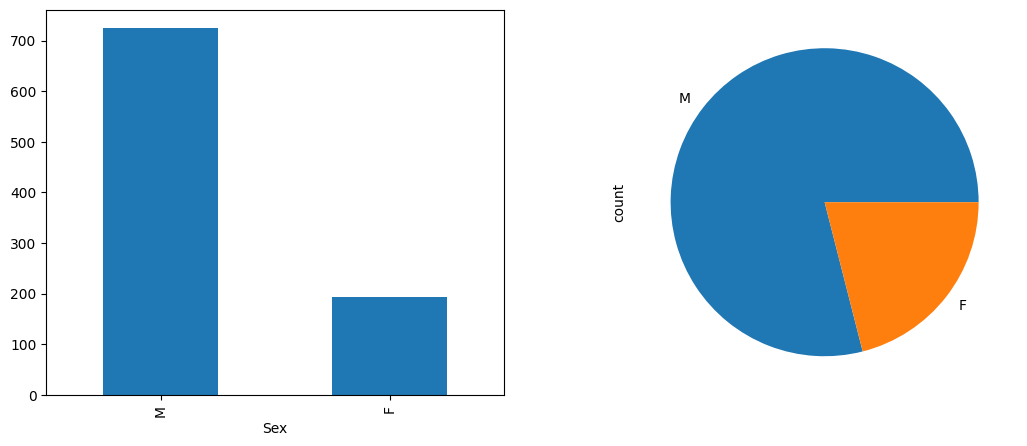

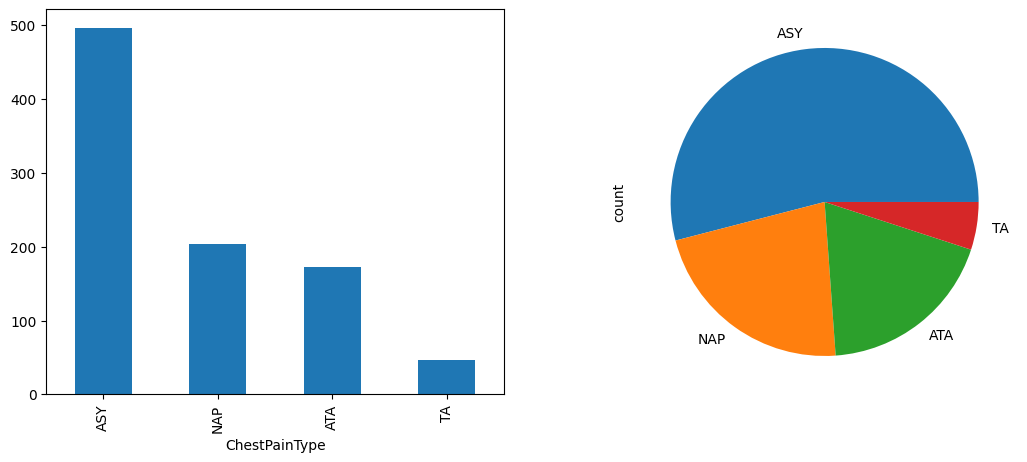

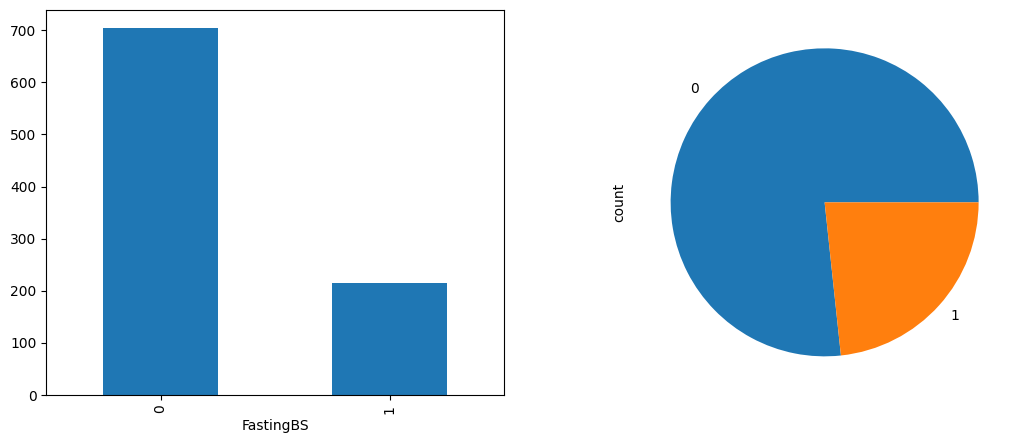

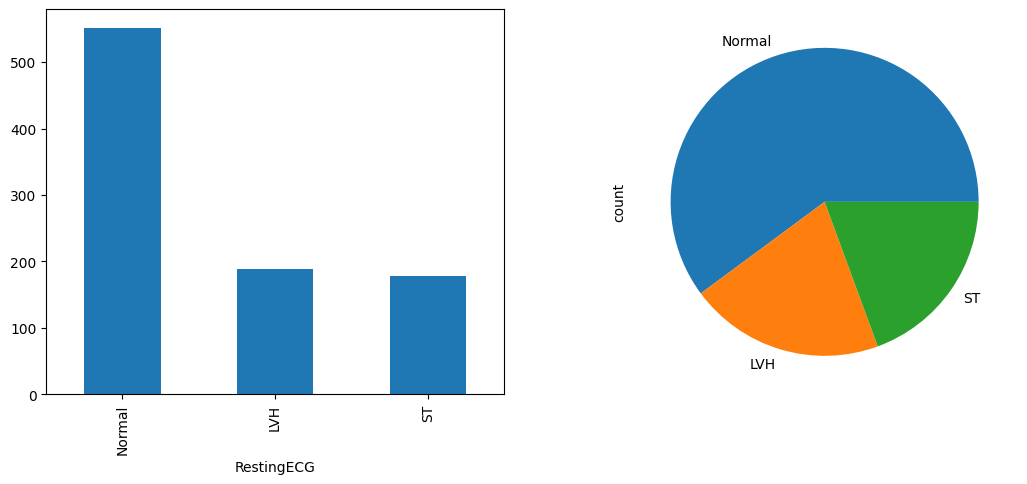

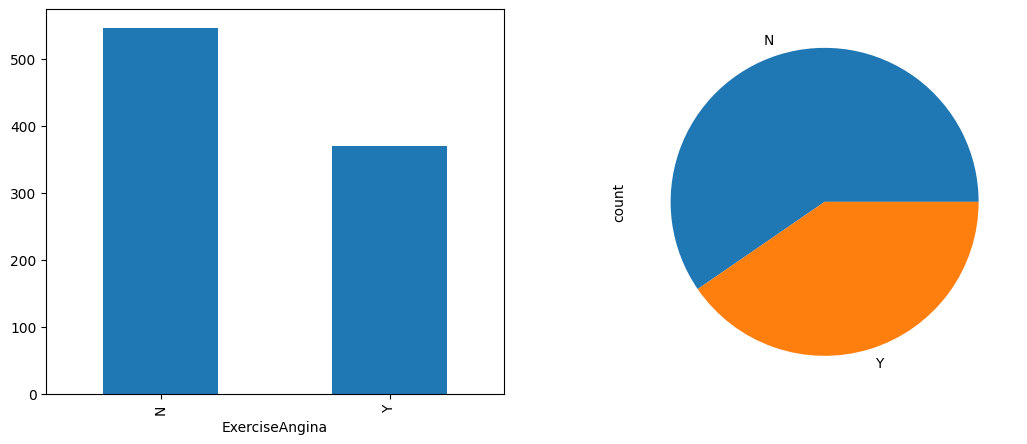

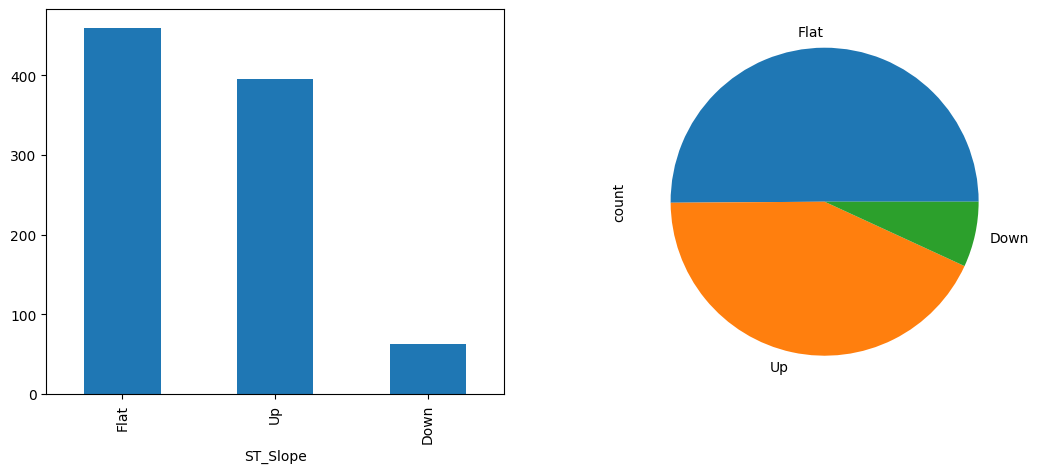

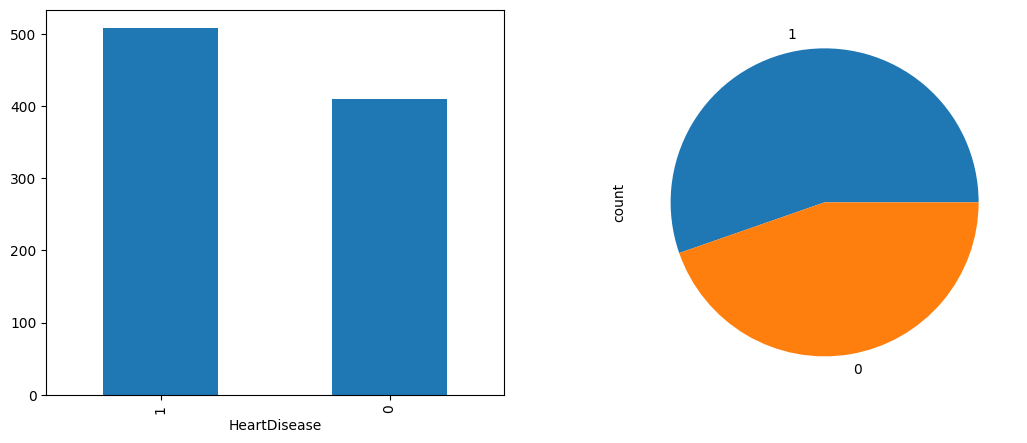

In [656]:
for col in df.select_dtypes('object'):
    plt.figure(figsize=[13,5])

    plt.subplot(1,2,1)
    df[col].value_counts().plot(kind="bar")
    
    plt.subplot(1,2,2)
    df[col].value_counts().plot.pie()


In [657]:
positive_df = df[df['HeartDisease'] == 1]
negative_df = df[df['HeartDisease'] == 0]

In [658]:
positive_df.value_counts()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
31   M    ASY            120.0      270.0        0          Normal      153.0  Y               1.5      Flat      1               1
59   M    ASY            140.0      177.0        0          Normal      162.0  Y               0.0      Up        1               1
60   M    ASY            142.0      216.0        0          Normal      110.0  Y               2.5      Flat      1               1
                         140.0      293.0        0          LVH         170.0  N               1.2      Flat      1               1
                                    281.0        0          ST          118.0  Y               1.5      Flat      1               1
                                                                                                                                 ..
53   M    ASY            124.0      243.0        0          Normal      122.0  Y 

In [659]:
negative_df.value_counts()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
28   M    ATA            130.0      132.0        0          LVH         185.0  N               0.0      Up        0               1
54   F    ATA            132.0      288.0        1          LVH         159.0  Y               0.0      Up        0               1
     M    NAP            150.0      232.0        0          LVH         165.0  N               1.6      Up        0               1
                                    195.0        0          Normal      122.0  N               0.0      Up        0               1
                         133.0      203.0        0          ST          137.0  N               0.2      Up        0               1
                                                                                                                                 ..
45   M    ASY            140.0      224.0        0          Normal      144.0  N 

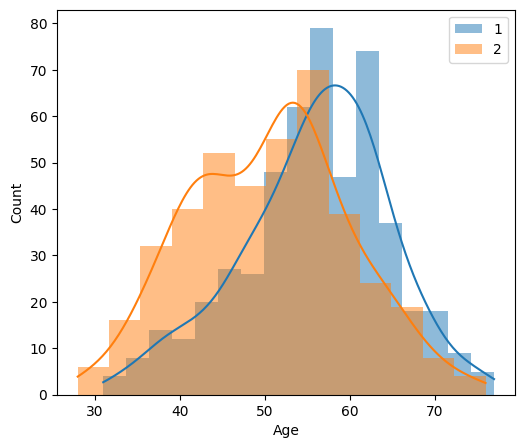

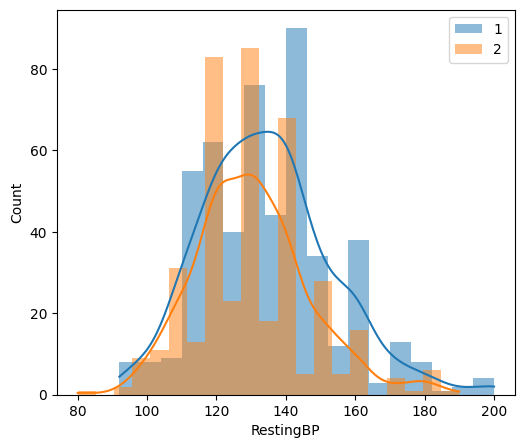

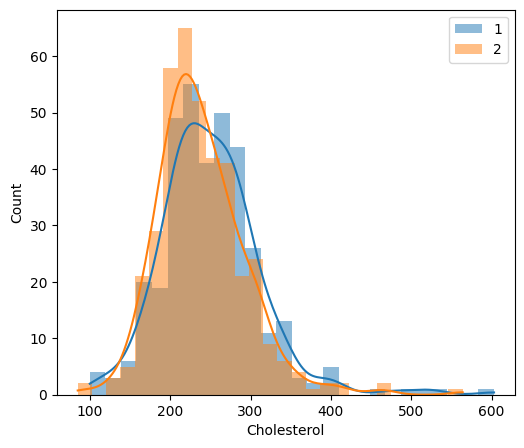

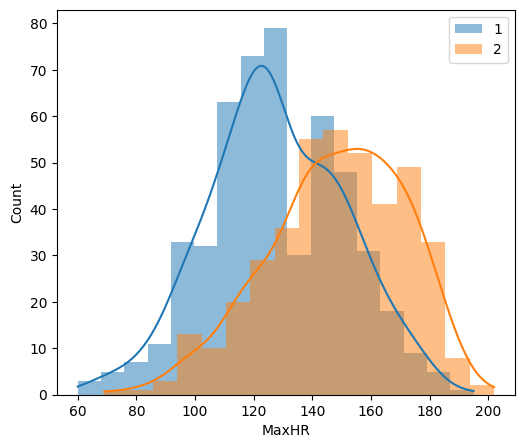

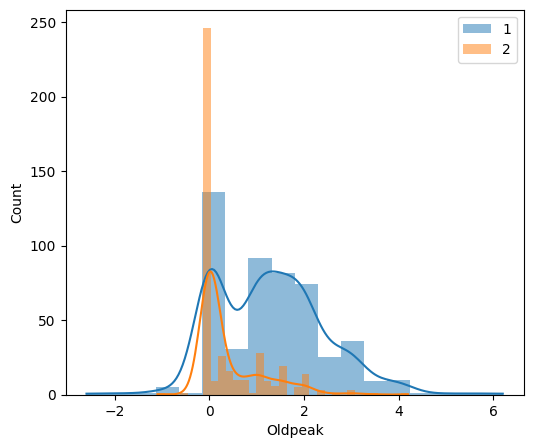

In [660]:
for col in positive_df.select_dtypes(['float64', 'int64']):
    plt.figure(figsize=[13,5])

    plt.subplot(1,2,1)
    sns.histplot(positive_df[col], kde=True, label = '1', edgecolor = None)
    sns.histplot(negative_df[col], kde=True, label = '2', edgecolor = None)

    plt.legend()
    plt.show()

Notes : 

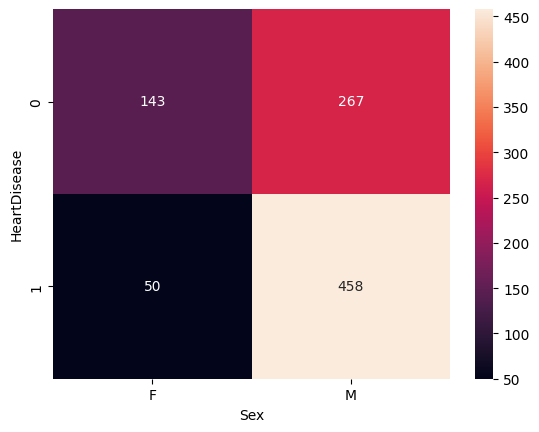

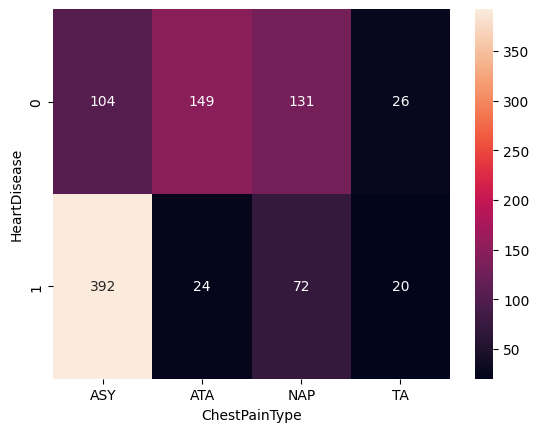

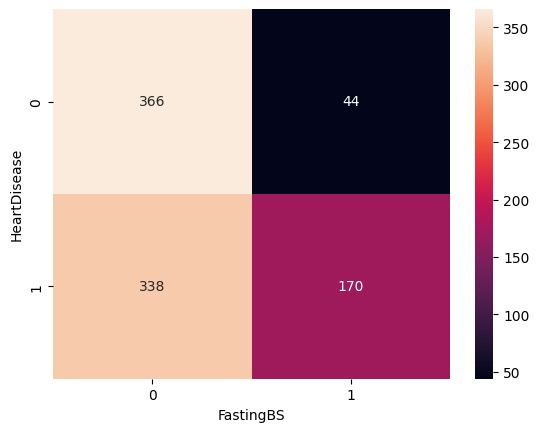

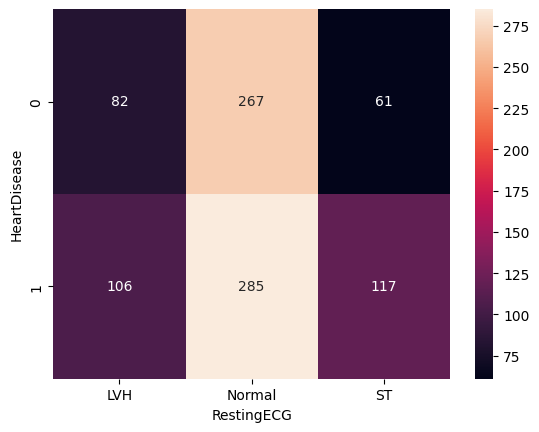

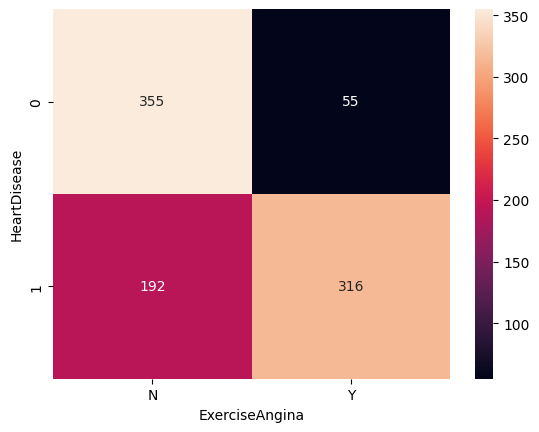

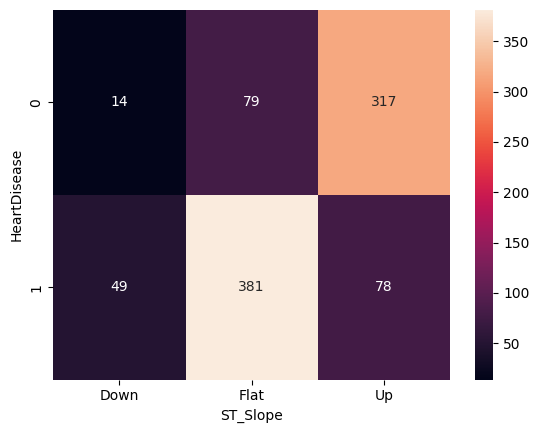

In [661]:
for col in df.drop('HeartDisease', axis = 1).select_dtypes('object'):
    plt.figure()
    sns.heatmap(pd.crosstab(df['HeartDisease'], df[col]), annot=True, fmt='d')

## Préprocessing

In [662]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [663]:
from sklearn.model_selection import train_test_split

trainsset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [664]:
trainsset['HeartDisease'].value_counts()

HeartDisease
1    401
0    333
Name: count, dtype: int64

In [665]:
testset['HeartDisease'].value_counts()

HeartDisease
1    107
0     77
Name: count, dtype: int64

### Encodage des variables qualitatives

In [666]:
df_encoding = pd.get_dummies(df, columns= list(df.drop('HeartDisease', axis = 1).select_dtypes('object').columns), dtype=int)

In [667]:
df_encoding.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,172.0,0.0,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
1,49,160.0,180.0,156.0,1.0,1,1,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,98.0,0.0,0,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
3,48,138.0,214.0,108.0,1.5,1,1,0,1,0,...,1,0,0,1,0,0,1,0,1,0
4,54,150.0,195.0,122.0,0.0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1


In [668]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 918
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          917 non-null    float64
 2   Cholesterol        746 non-null    float64
 3   MaxHR              918 non-null    float64
 4   Oldpeak            918 non-null    float64
 5   HeartDisease       918 non-null    object 
 6   Sex_F              918 non-null    int32  
 7   Sex_M              918 non-null    int32  
 8   ChestPainType_ASY  918 non-null    int32  
 9   ChestPainType_ATA  918 non-null    int32  
 10  ChestPainType_NAP  918 non-null    int32  
 11  ChestPainType_TA   918 non-null    int32  
 12  FastingBS_0        918 non-null    int32  
 13  FastingBS_1        918 non-null    int32  
 14  RestingECG_LVH     918 non-null    int32  
 15  RestingECG_Normal  918 non-null    int32  
 16  RestingECG_ST      918 non-null

In [669]:
from sklearn.preprocessing import StandardScaler

def preprocessing(df):
    
    #encodage
    df = pd.get_dummies(df, columns=list(df.drop('HeartDisease',axis=1).select_dtypes('object').columns), dtype=int)
    df['HeartDisease'] = df['HeartDisease'].astype('int')
    
    #Selection des variables
    df = df.drop(['Sex_F','FastingBS_0','ExerciseAngina_N', 'ST_Slope_Flat', 'ChestPainType_TA', 'ST_Slope_Down'], axis=1)
    #df = df[['ST_Slope_Up', 'MaxHR', 'Oldpeak', 'ChestPainType_ASY', 'Cholesterol','RestingBP', 'Age', 'HeartDisease']]
    #gestion des valeurs manquantes
    #df = df.dropna()
    df = df.fillna(df.mean())
    
    #division variables explicatives et variable cible    
    x = df.drop('HeartDisease', axis=1)
    y = df['HeartDisease']
    
    #x = StandardScaler().fit_transform(x)
    return x, y

In [670]:
x_train, y_train = preprocessing(trainsset)
x_test, y_test = preprocessing(testset)

### Construction du premier modèle

In [671]:
#from sklearn.tree import DecisionTreeClassifier

#model = DecisionTreeClassifier(random_state=0)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#model = RandomForestClassifier(random_state=0)
model = SVC(random_state=0)
model.fit(x_train, y_train)


SVC(random_state=0)

In [672]:
y_pred = model.predict(x_test)
len(y_pred)

184

In [673]:
len(y_test)

184

## Evaluation du premier modèle

#### Matrice de confusion

In [674]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[47 30]
 [31 76]]


#### Classification report

In [675]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.61      0.61        77
           1       0.72      0.71      0.71       107

    accuracy                           0.67       184
   macro avg       0.66      0.66      0.66       184
weighted avg       0.67      0.67      0.67       184



#### Learning curve

In [676]:
import numpy as np
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model, x_train, y_train, cv=4, scoring = 'f1', train_sizes=np.linspace(0.1,1,10))

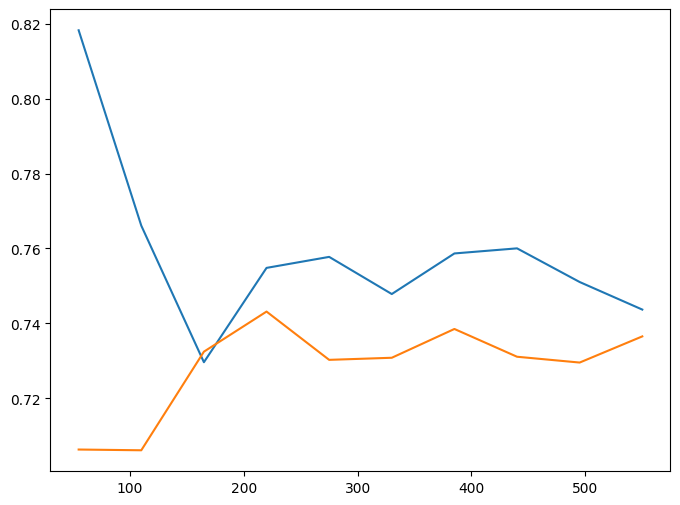

In [677]:
plt.figure(figsize=(8,6))
plt.plot(N, train_score.mean(axis= 1), label= "train_score")
plt.plot(N, val_score.mean(axis= 1), label= "train_score")

Corrélation des variables

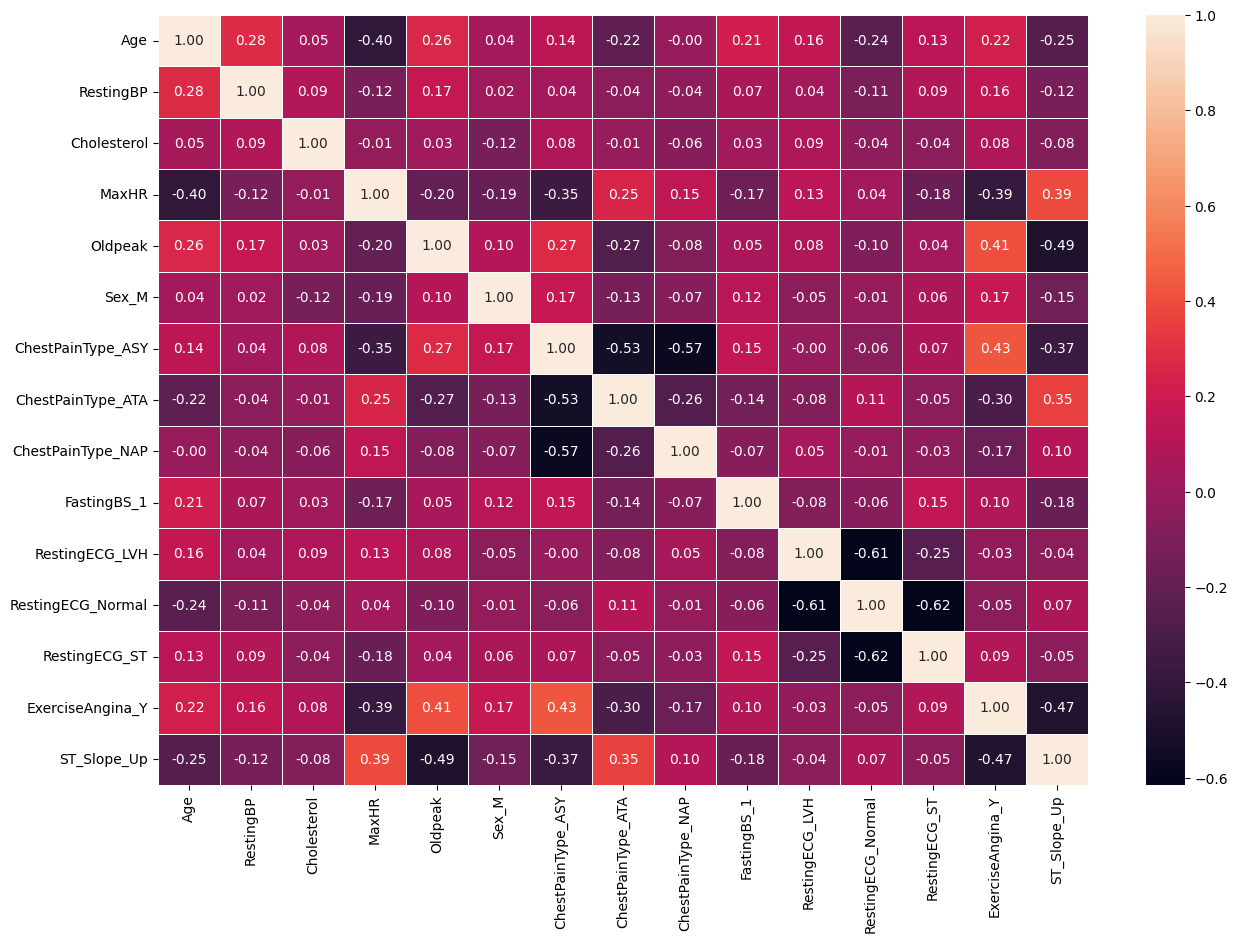

In [678]:
corr_mat = x_train.corr()
fig, ax = plt.subplots(figsize=[15,10])
ax = sns.heatmap(corr_mat, annot=True, linewidths=0.5, fmt="0.2f")

On supprime: Sex_F, FastingBS 0, ExerciceAngina_N, ST_Slope_Flat

*** Variance des variables ***

In [679]:
x_train.var(axis=0)

Age                    87.231126
RestingBP             317.130058
Cholesterol          2806.571095
MaxHR                 657.098277
Oldpeak                 1.097833
Sex_M                   0.166805
ChestPainType_ASY       0.249270
ChestPainType_ATA       0.158739
ChestPainType_NAP       0.172231
FastingBS_1             0.170699
RestingECG_LVH          0.157912
RestingECG_Normal       0.239033
RestingECG_ST           0.158739
ExerciseAngina_Y        0.242245
ST_Slope_Up             0.245878
dtype: float64

On peut supprimer ST_SLope_down et CheastPain_TA

***Création de fonction d'apprentissage***

In [680]:
from sklearn.preprocessing import StandardScaler

def preprocessing(df):
    
    #encodage
    df = pd.get_dummies(df, columns=list(df.drop('HeartDisease',axis=1).select_dtypes('object').columns), dtype=int)
    df['HeartDisease'] = df['HeartDisease'].astype('int')
    
    #Selection des variables
    df = df.drop(['Sex_F','FastingBS_0','ExerciseAngina_N', 'ST_Slope_Flat', 'ChestPainType_TA', 'ST_Slope_Down'], axis=1)
    #df = df[['ST_Slope_Up', 'MaxHR', 'Oldpeak', 'ChestPainType_ASY', 'Cholesterol','RestingBP', 'Age', 'HeartDisease']]
    #gestion des valeurs manquantes
    #df = df.dropna()
    df = df.fillna(df.mean())
    
    #division variables explicatives et variable cible    
    x = df.drop('HeartDisease', axis=1)
    y = df['HeartDisease']
    
    x = StandardScaler().fit_transform(x)
    return x, y

In [681]:
def evaluation(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    N, train_score, val_score = learning_curve(model, x_train, y_train, cv=4, scoring = 'f1', train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(8,6))
    plt.plot(N, train_score.mean(axis= 1), label= "train_score")
    plt.plot(N, val_score.mean(axis= 1), label= "train_score")   
   # pd.DataFrame(model.feature_importances_, index=x_train.columns).sort_values(by=0, ascending=False).plot.bar()
    

[[47 30]
 [31 76]]
              precision    recall  f1-score   support

           0       0.60      0.61      0.61        77
           1       0.72      0.71      0.71       107

    accuracy                           0.67       184
   macro avg       0.66      0.66      0.66       184
weighted avg       0.67      0.67      0.67       184



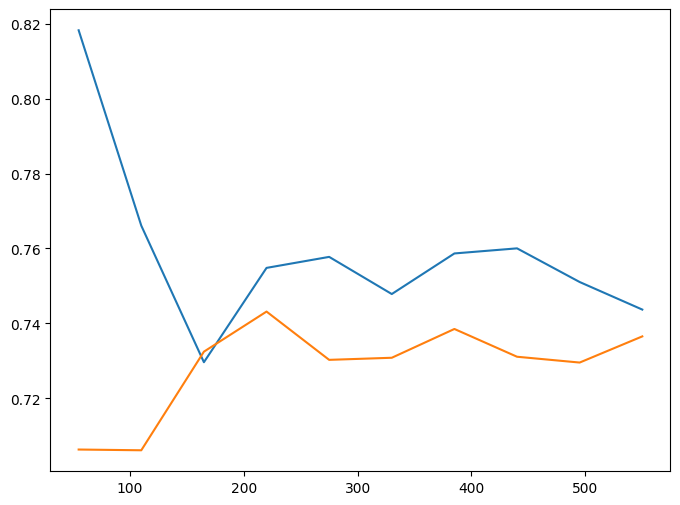

In [682]:

evaluation(model, x_train, y_train, x_test, y_test)

[[59 18]
 [12 95]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        77
           1       0.84      0.89      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



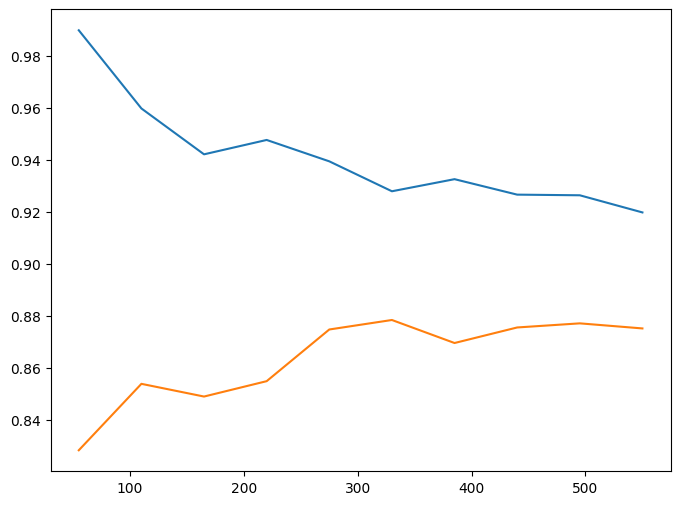

In [683]:
x_train, y_train = preprocessing(trainsset)
x_test, y_test = preprocessing(testset)
evaluation(model, x_train, y_train, x_test, y_test)

*** Selection avec test stat ***

[[56 21]
 [11 96]]
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        77
           1       0.82      0.90      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.81      0.82       184
weighted avg       0.83      0.83      0.82       184



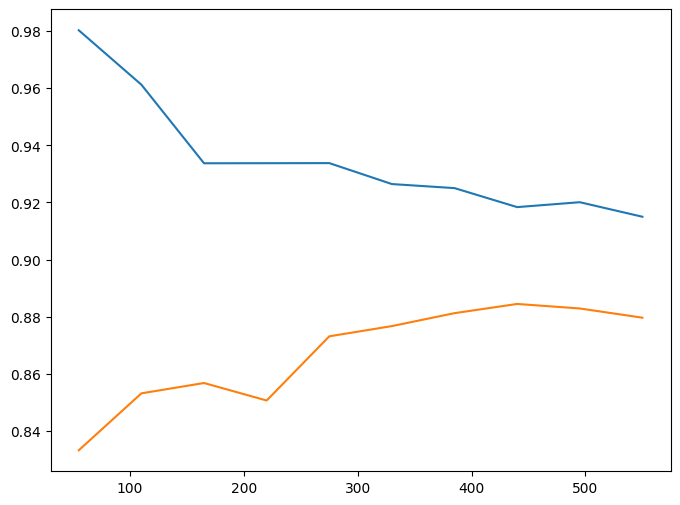

In [684]:
from sklearn.feature_selection import SelectKBest, f_classif

X_train, Y_train = preprocessing(trainsset)
X_test, Y_test = preprocessing(testset)

selector = SelectKBest(score_func=f_classif,k=12)

X_train = selector.fit_transform(X_train,Y_train)
X_test = selector.transform(X_test)

evaluation(model, X_train, Y_train, X_test, Y_test)


**** Parametrage des modeles

In [698]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SelectKBest(score_func=f_classif),RandomForestClassifier(random_state=0))

model.get_params()

{'memory': None,
 'steps': [('selectkbest', SelectKBest()),
  ('randomforestclassifier', RandomForestClassifier(random_state=0))],
 'verbose': False,
 'selectkbest': SelectKBest(),
 'randomforestclassifier': RandomForestClassifier(random_state=0),
 'selectkbest__k': 10,
 'selectkbest__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>,
 'randomforestclassifier__bootstrap': True,
 'randomforestclassifier__ccp_alpha': 0.0,
 'randomforestclassifier__class_weight': None,
 'randomforestclassifier__criterion': 'gini',
 'randomforestclassifier__max_depth': None,
 'randomforestclassifier__max_features': 'sqrt',
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_samples': None,
 'randomforestclassifier__min_impurity_decrease': 0.0,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__min_weight_fraction_leaf': 0.0,
 'randomforestclassifier__monotonic_cst': None,

Liste des hyperparams

In [699]:
hyper_param = {
    "selectkbest_k": list(range(10,15)),
    "randomforestclassifier__max_depth": [None,3,10],
    }

In [701]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model, hyper_param, scoring="f1",cv=4)

X_train, Y_train = preprocessing(trainsset)
X_test, Y_test = preprocessing(testset)

evaluation(grid, X_train, Y_train, X_test, Y_test)

ValueError: 
All the 60 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python39\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Python39\lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
  File "c:\Python39\lib\site-packages\sklearn\pipeline.py", line 388, in _fit
    self._validate_steps()
  File "c:\Python39\lib\site-packages\sklearn\pipeline.py", line 258, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' '10' (type <class 'int'>) doesn't

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python39\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Python39\lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
  File "c:\Python39\lib\site-packages\sklearn\pipeline.py", line 388, in _fit
    self._validate_steps()
  File "c:\Python39\lib\site-packages\sklearn\pipeline.py", line 258, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' '11' (type <class 'int'>) doesn't

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python39\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Python39\lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
  File "c:\Python39\lib\site-packages\sklearn\pipeline.py", line 388, in _fit
    self._validate_steps()
  File "c:\Python39\lib\site-packages\sklearn\pipeline.py", line 258, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' '12' (type <class 'int'>) doesn't

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python39\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Python39\lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
  File "c:\Python39\lib\site-packages\sklearn\pipeline.py", line 388, in _fit
    self._validate_steps()
  File "c:\Python39\lib\site-packages\sklearn\pipeline.py", line 258, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' '13' (type <class 'int'>) doesn't

--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python39\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Python39\lib\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
  File "c:\Python39\lib\site-packages\sklearn\pipeline.py", line 388, in _fit
    self._validate_steps()
  File "c:\Python39\lib\site-packages\sklearn\pipeline.py", line 258, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' '14' (type <class 'int'>) doesn't
